### Datasets Get and Handling

In [1]:
# !wget --no-check-certificate \
#     https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip \
#     -O datasets/Chessman-image-dataset.zip

In [2]:
import os, zipfile
import tensorflow as tf
# loc_zip = 'datasets/Chessman-image-dataset.zip'
# zipref = zipfile.ZipFile(loc_zip, 'r')
# # os.mkdir(os.path.join('datasets','cheesman'))
# zipref.extractall(os.path.join('datasets'))

2023-04-01 00:01:29.641804: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Start Neural Net

Selanjutnya kita perlu melihat berapa banyak gambar pada setiap direktori. Dari output dapat dilihat bahwa jumlah sampel pada tiap direktori berbeda. Perlu diperhatikan juga dataset ini berukuran sangat kecil sehingga performa dari model mungkin tidak akan terlalu baik. Kita akan mencoba menggunakan augmentasi gambar untuk mengatasi masalah ini.

In [3]:
for dir in os.listdir('datasets/Chessman-image-dataset/Chess'):
    print(dir+':',len(os.listdir(os.path.join('datasets/Chessman-image-dataset/Chess',dir))))

Bishop: 87
Rook: 102
Pawn: 107
Knight: 106
King: 76
Queen: 78


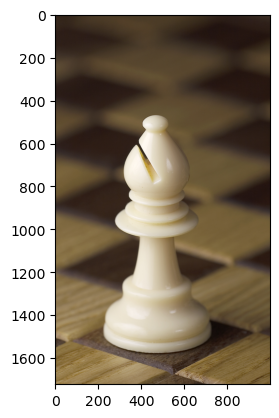

In [4]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

img = image.load_img('datasets/Chessman-image-dataset/Chess/Bishop/00000002.JPG')
imgplot = plt.imshow(img)

### Augmentasi Gambar dengan ImageDataGen

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join('datasets/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   rotation_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   fill_mode = 'nearest',
                                   validation_split = 0.1)

Dataset yang kita miliki hanya terdiri dari 1 buah direktori dan tidak terbagi menjadi direktori training dan testing. Tapi tenang, dengan ImageDataGenerator kita tidak perlu susah payah membagi direktori secara manual, cukup dengan menggunakan parameter validation_split yang disebut pada paragraf sebelumnya. Dengan parameter tersebut, kita hanya cukup memberi tahu ImageDataGenerator mana data untuk training dan mana data untuk testing dengan menambahkan parameter subset dengan nilai training atau validation.



In [6]:
train_generate = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size = 8,
                                                   class_mode = 'categorical',
                                                   subset = 'training' #untuk training 
                                                   )
validation_generate = train_datagen.flow_from_directory(train_dir,
                                                        target_size=(150,150),
                                                        batch_size = 15,
                                                        class_mode='categorical',
                                                        subset = 'validation' # untuk validasi
                                                        )

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


### Buat MODEL
 3 lapis convolution dan 2 hidden layer dengan 512 dan 256 buah unit perseptron.

In [7]:
## Note the input shape is the desired size of the image 150x150 with 3 bytes color
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation= 'relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=6, activation='softmax')
])

##### COmpile

In [8]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [9]:
history = model.fit(train_generate, 
                    validation_data = validation_generate, 
                    epochs=50, 
                    verbose=2)

Epoch 1/50


2023-04-01 00:02:14.002436: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-04-01 00:02:58.372959: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


63/63 - 47s - loss: 1.8670 - accuracy: 0.1743 - val_loss: 1.7868 - val_accuracy: 0.1923 - 47s/epoch - 753ms/step
Epoch 2/50
63/63 - 45s - loss: 1.7864 - accuracy: 0.1804 - val_loss: 1.7813 - val_accuracy: 0.1923 - 45s/epoch - 717ms/step
Epoch 3/50
63/63 - 55s - loss: 1.7691 - accuracy: 0.2124 - val_loss: 1.7821 - val_accuracy: 0.1731 - 55s/epoch - 874ms/step
Epoch 4/50
63/63 - 40s - loss: 1.6954 - accuracy: 0.2946 - val_loss: 1.5804 - val_accuracy: 0.3077 - 40s/epoch - 630ms/step
Epoch 5/50
63/63 - 38s - loss: 1.6017 - accuracy: 0.3527 - val_loss: 1.6551 - val_accuracy: 0.3462 - 38s/epoch - 611ms/step
Epoch 6/50
63/63 - 35s - loss: 1.5064 - accuracy: 0.3848 - val_loss: 1.7115 - val_accuracy: 0.2885 - 35s/epoch - 558ms/step
Epoch 7/50
63/63 - 33s - loss: 1.4299 - accuracy: 0.4248 - val_loss: 1.5054 - val_accuracy: 0.3462 - 33s/epoch - 528ms/step
Epoch 8/50
63/63 - 35s - loss: 1.3298 - accuracy: 0.4749 - val_loss: 1.4462 - val_accuracy: 0.4038 - 35s/epoch - 558ms/step
Epoch 9/50
63/63 - 

KeyboardInterrupt: 

### PLOT ACCURACY & LOSS MODEL 

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()